 ## Data Scientist Challenge - LATAM Airlines

In [3]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se procede a leer el csv proporcionado para conocer algunos datos como la dimension, las cabeceras, y tipos de datos

In [22]:
df_scl = pd.read_csv('data\dataset_SCL.csv', low_memory=False, header=0, parse_dates=True)


In [23]:
df_scl.shape

(68206, 18)

In [24]:
df_scl.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

In [28]:
# Vista previa de los 5 primeros datos
df_scl.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


Antes de empezar a responder las preguntas vamos a analizar un poco el dataset y limpiar/preparar los datos que tenemos

In [27]:
# Busca cuales columnas tienen datos nulos
df_scl.isna().any()

Fecha-I      False
Vlo-I        False
Ori-I        False
Des-I        False
Emp-I        False
Fecha-O      False
Vlo-O         True
Ori-O        False
Des-O        False
Emp-O        False
DIA          False
MES          False
AÑO          False
DIANOM       False
TIPOVUELO    False
OPERA        False
SIGLAORI     False
SIGLADES     False
dtype: bool

Al parecer solo la columna Vlo-0 tiene un dato nulo que se hara un dropna()

In [29]:
df_scl.dropna()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


De esta manera el shape de el dataframe sera de (6825, 18)

## 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Con los datos limpios vamos a realizar un analisis exploratorio de los datos de acuerdo a algunos criterios. Primero al realizar un count de los datos por año vemos que en 2017 hay una gran cantidad de datos mientras que en 2017 apenas hay 2 datos.

### Frecuencia de Vuelos por Año

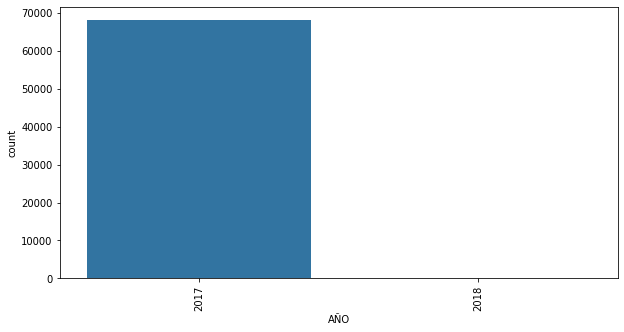

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='AÑO', data=df_scl)
plt.xticks(rotation=90)
plt.show()

In [30]:
df_scl.AÑO.value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

### Frecuencia de Vuelos por Mes

Tambien podemos hacer un analisis de los meses que mas frecuencia existen los vuelos, y podemos observar que es en Diciembre cuando hay mas vuelos. Lo que es razonable ya por las festividades del mes.

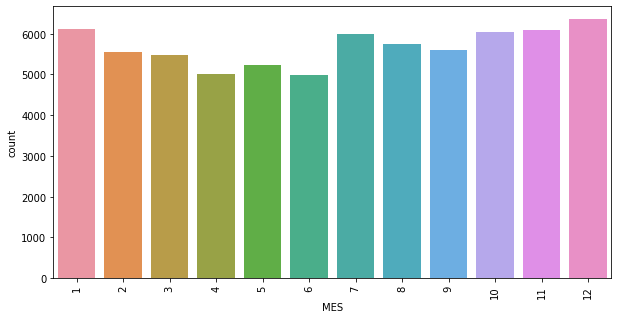

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='MES', data=df_scl)
plt.xticks(rotation=90)
plt.show()

In [31]:
df_scl.MES.value_counts()

12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: MES, dtype: int64

### Frecuencia de Vuelos por Aerolineas

En el siguiente analisis vemos que la aerolinea con mas vuelos es Grupo LATAM con 40892 vuelos

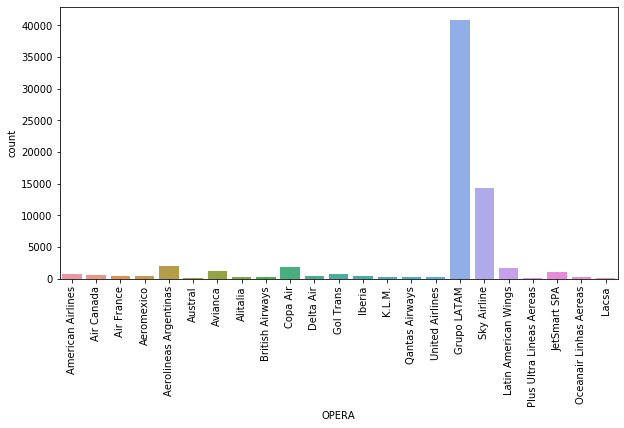

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='OPERA', data=df_scl)
plt.xticks(rotation=90)
plt.show()

In [40]:
df_scl['OPERA'].value_counts()

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

### Frecuencia de Vuelos por Destino

El destino mas frecuente es el de Buenos Aires, mientras que los menos frecuentes son Washington, Cochabamba ,Pisco - Peru, Puerto Stanley

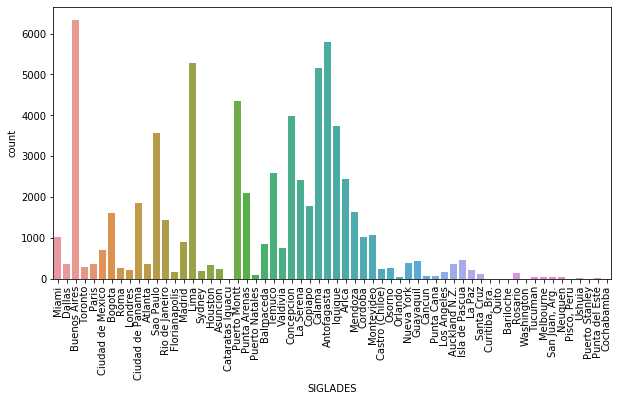

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='SIGLADES', data=df_scl)
plt.xticks(rotation=90)
plt.show()

In [50]:
df_scl['SIGLADES'].value_counts()

Buenos Aires      6335
Antofagasta       5786
Lima              5270
Calama            5146
Puerto Montt      4357
                  ... 
Quito                2
Washington           1
Cochabamba           1
Pisco, Peru          1
Puerto Stanley       1
Name: SIGLADES, Length: 62, dtype: int64

### Frecuencia de Vuelos por Dia

En este caso el dia con menos frecuencia de vuelos es el sabado y el dia con mas vuelos es el viernes.

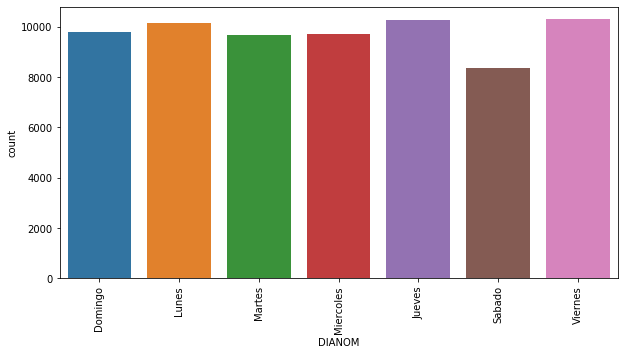

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='DIANOM', data=df_scl)
plt.xticks(rotation=90)
plt.show()

In [49]:
df_scl['DIANOM'].value_counts()

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64